In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline 
#rcParams["figure.figsize"] =20,10

In [3]:
data = pd.read_csv("Downloads\Table_complete.csv")

In [4]:
data.head()

,Unnamed: 0,City,Cappuccino,Cinema,Wine,Gasoline,Avg.Rent,Avg.Disposable.Income,Country,y
0,1,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76,Switzerland,C8
1,2,Beijing,2.64,8.46,10.36,0.86,1586.25,600.13,China,C1
2,3,Belfast,2.19,5.98,6.22,1.39,807.12,1494.67,United Kingdom,C3
3,4,Belgrade,1.10,2.98,3.02,1.17,426.24,359.90,Serbia,C1
4,5,Belo Horizonte,1.38,5.69,8.13,0.90,764.05,455.69,Brazil,C1


In [5]:
data.tail()

,Unnamed: 0,City,Cappuccino,Cinema,Wine,Gasoline,Avg.Rent,Avg.Disposable.Income,Country,y
191,192,Warsaw,1.66,5.19,5.19,1.18,726.59,664.31,Poland,C2
192,193,Washington,2.37,7.85,7.85,0.69,2451.63,2484.32,United States of America,C5
193,194,Wellington,2.20,8.82,8.27,1.17,1515.65,1763.67,New Zealand,C4
194,195,Zagreb,1.12,3.70,4.48,1.23,504.36,605.23,Croatia,C1
195,196,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55,Switzerland,C8


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.columns

Index(['City', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg.Rent',
       'Avg.Disposable.Income', 'Country', 'y'],
      dtype='object')

In [8]:
data_Ordered = data.sort_values(by='Avg.Disposable.Income')

<AxesSubplot:xlabel='y', ylabel='Avg.Disposable.Income'>

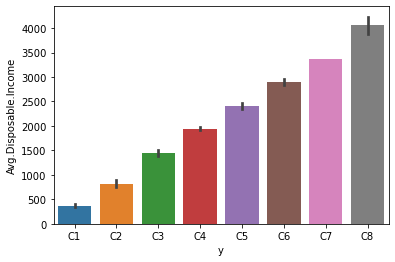

In [9]:
sns.barplot(x='y', y='Avg.Disposable.Income', data=data_Ordered)

In [10]:
new_data =  data.set_index("City").drop(['Country','y'], axis=1)

In [11]:
new_data.head()

,Cappuccino,Cinema,Wine,Gasoline,Avg.Rent,Avg.Disposable.Income
City,,,,,,
Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
Beijing,2.64,8.46,10.36,0.86,1586.25,600.13
Belfast,2.19,5.98,6.22,1.39,807.12,1494.67
Belgrade,1.10,2.98,3.02,1.17,426.24,359.90
Belo Horizonte,1.38,5.69,8.13,0.90,764.05,455.69


In [12]:
X = new_data.iloc[:, :].values

In [13]:
from sklearn.cluster import KMeans

C:\Users\dielv\anaconda3\envs\dashboard\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


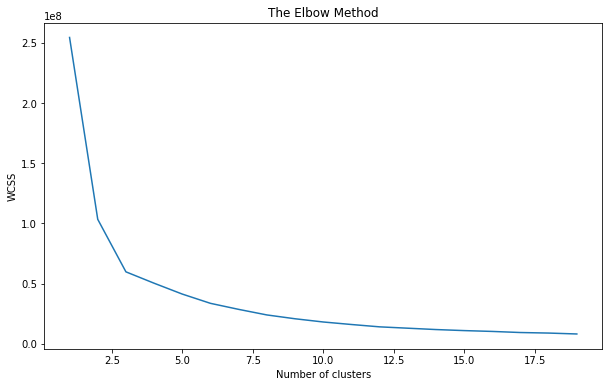

In [14]:
#Choix du nombre de cluster
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [16]:
# On choisit 5 cluster
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [17]:
kmeans.cluster_centers_.shape

(3, 6)

No handles with labels found to put in legend.


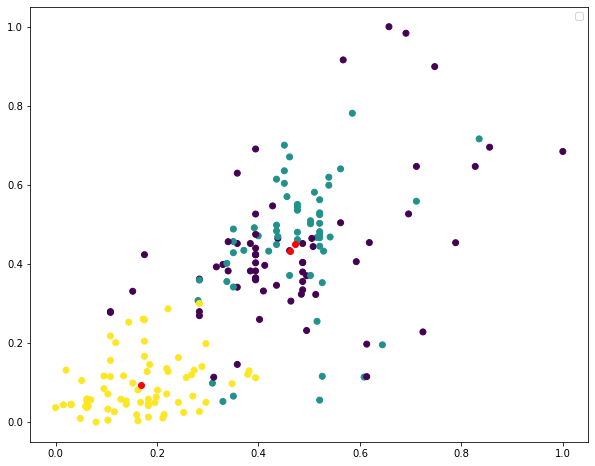

In [18]:
# Visualisation des cluster
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,5], c= y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,5], c='r')
plt.legend()

In [19]:
kmeans.inertia_

16.327311191635417

In [20]:
kmeans.labels_

array([0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 2,
       1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0,
       0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0])

In [21]:
data['label'] = kmeans.labels_

In [22]:
data

,City,Cappuccino,Cinema,Wine,Gasoline,Avg.Rent,Avg.Disposable.Income,Country,y,label
0,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76,Switzerland,C8,0
1,Beijing,2.64,8.46,10.36,0.86,1586.25,600.13,China,C1,1
2,Belfast,2.19,5.98,6.22,1.39,807.12,1494.67,United Kingdom,C3,0
3,Belgrade,1.10,2.98,3.02,1.17,426.24,359.90,Serbia,C1,2
4,Belo Horizonte,1.38,5.69,8.13,0.90,764.05,455.69,Brazil,C1,2
...,...,...,...,...,...,...,...,...,...,...
191,Warsaw,1.66,5.19,5.19,1.18,726.59,664.31,Poland,C2,2
192,Washington,2.37,7.85,7.85,0.69,2451.63,2484.32,United States of America,C5,1
193,Wellington,2.20,8.82,8.27,1.17,1515.65,1763.67,New Zealand,C4,0
194,Zagreb,1.12,3.70,4.48,1.23,504.36,605.23,Croatia,C1,2


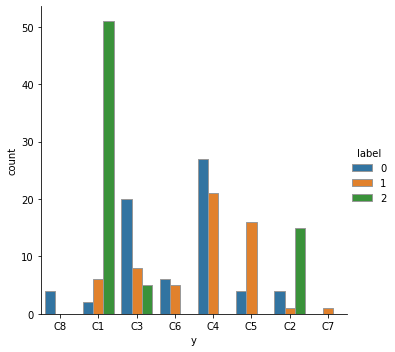

In [23]:
sns.catplot(x="y", hue="label", kind="count", edgecolor=".6",data=data)

In [24]:
kmeans.predict(scaler.transform([[4,8,5.25,7,1000,2500]]).reshape(1,-1))

array([0])

In [25]:
"""# load the model
model = pickle.load(open("model_kmeans.pkl", "rb"))

# use model to predict
y_pred = model_kmeans.predict(X_input)"""

'# load the model\nmodel = pickle.load(open("model_kmeans.pkl", "rb"))\n\n# use model to predict\ny_pred = model_kmeans.predict(X_input)'

In [26]:
import joblib

In [27]:
joblib.dump(scaler,'smart_city_scaler.pkl')

['smart_city_scaler.pkl']

In [28]:
joblib.dump(kmeans,'smart_city_model.sav')

['smart_city_model.sav']

In [29]:
smart_c_model = joblib.load("smart_city_model.sav")

In [30]:
smart_c_scaler = joblib.load('smart_city_scaler.pkl')

In [31]:
new_data.head(1)

,Cappuccino,Cinema,Wine,Gasoline,Avg.Rent,Avg.Disposable.Income
City,,,,,,
Basel,3.5,11.89,7.35,1.25,1649.29,3847.76


In [32]:
place_example = {'Cappuccino':3.50,
                'Cinema' : 11.89,
                'Wine' : 7.35,
                'Gasoline' : 1.25,
                'Avg.Rent' : 1649.29,
                'Avg.Disposable.Income' : 3847.76}

In [33]:
def return_prediction(model,scaler,sample_json):
    capp_ = sample_json['Cappuccino']
    cine_ = sample_json['Cinema']
    wine_ = sample_json["Wine"]
    gaso_ = sample_json['Gasoline']
    rent_ = sample_json['Avg.Rent']
    inc_ = sample_json['Avg.Disposable.Income']
    
    place = [[capp_,cine_,wine_,gaso_,rent_,inc_]]
    
    place = scaler.transform(place)
    
    classes = model.predict(place)
    
    villes = data['City'][data['label']==int(classes)]
    
    return list(villes)

In [34]:
return_prediction(smart_c_model,smart_c_scaler,place_example)

['Basel',
 'Belfast',
 'Bergen',
 'Berlin',
 'Birmingham',
 'Brighton',
 'Bristol',
 'Brussels',
 'Cambridge',
 'Christchurch',
 'Cologne',
 'Copenhagen',
 'Cork',
 'Dresden',
 'Dublin',
 'Dusseldorf',
 'Edinburgh',
 'Florence',
 'Frankfurt',
 'Galway',
 'Geneva',
 'Glasgow',
 'Gothenburg',
 'Haifa',
 'Hamburg',
 'Helsinki',
 'Hong Kong',
 'Istanbul',
 'Izmir',
 'Jerusalem',
 'Lausanne',
 'Leeds',
 'Leicester',
 'Limassol',
 'Liverpool',
 'London',
 'Luxembourg',
 'Lyon',
 'Madrid',
 'Malmo',
 'Manchester',
 'Marbella',
 'Marseille',
 'Milan',
 'Munich',
 'Nice',
 'Nicosia',
 'Nottingham',
 'Oslo',
 'Oxford',
 'Paris',
 'Rome',
 'Rotterdam',
 'Seoul',
 'Stavanger',
 'Stockholm',
 'Strasbourg',
 'Stuttgart',
 'The Hague',
 'Thessaloniki',
 'Toulouse',
 'Trondheim',
 'Utrecht',
 'Venice',
 'Vienna',
 'Wellington',
 'Zurich']

### Pour le déploiement

In [35]:
'''import pickle
import joblib
import numpy as np

smart_c_model = pickle.load(open("smart_city_model.pkl", "rb"))
smart_c_scaler = joblib.load('smart_city_scaler.plk')

def return_prediction(model,scaler,sample_json):
    capp_ = sample_json['Cappuccino']
    cine_ = sample_json['Cinema']
    wine_ = sample_json["Wine"]
    gaso_ = sample_json['Gasoline']
    rent_ = sample_json['Avg.Rent']
    inc_ = sample_json['Avg.Disposable.Income']
    
    place = [[capp_,cine_,wine_,gaso_,rent_,inc_]]
    
    place = scaler.transform(place)
    
    classes = model.predict(place)
    
    return classes '''

'import pickle\nimport joblib\nimport numpy as np\n\nsmart_c_model = pickle.load(open("smart_city_model.pkl", "rb"))\nsmart_c_scaler = joblib.load(\'smart_city_scaler.plk\')\n\ndef return_prediction(model,scaler,sample_json):\n    capp_ = sample_json[\'Cappuccino\']\n    cine_ = sample_json[\'Cinema\']\n    wine_ = sample_json["Wine"]\n    gaso_ = sample_json[\'Gasoline\']\n    rent_ = sample_json[\'Avg.Rent\']\n    inc_ = sample_json[\'Avg.Disposable.Income\']\n    \n    place = [[capp_,cine_,wine_,gaso_,rent_,inc_]]\n    \n    place = scaler.transform(place)\n    \n    classes = model.predict(place)\n    \n    return classes '